# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.

- Looking at the single mouse data from mouse s185, this graph pulled the single mouse with the best overall results of the entire data set.
- The data shows that Capomulin works the best in subjects that weight the least. 
- While the focus on the Capomulin, it seems like the Ramicane had similar positive results overall. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on ="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
num_mice = combined_data['Mouse ID'].nunique()
print(f"Number of mice: {num_mice}")

Number of mice: 249


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
print(repr(duplicate_mice))

array(['g989'], dtype=object)


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mice)]
duplicate_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data[~combined_data['Mouse ID'].isin(duplicate_mice)]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_num_mice = clean_df['Mouse ID'].nunique()
print(f"The number of clean mice is: {clean_num_mice}")

The number of clean mice is: 248


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

#Group by drug regimen
regimen_grouped = clean_df.groupby('Drug Regimen')

#Calculate summary statistics
mean_tumor_volume = regimen_grouped['Tumor Volume (mm3)'].mean()
median_tumor_volume = regimen_grouped['Tumor Volume (mm3)'].median()
variance_tumor_volume = regimen_grouped['Tumor Volume (mm3)'].var()
std_tumor_volume = regimen_grouped['Tumor Volume (mm3)'].std()
sem_tumor_volume = regimen_grouped['Tumor Volume (mm3)'].sem()

#Assemble the resulting series into a single summary DataFrame
summary_statistics = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume, 
    'Tumor Volume Variance': variance_tumor_volume,
    'Tumor Volume Standard Deviation': std_tumor_volume, 
    'Tumor Volume Standard Error': sem_tumor_volume  
})
 #Display summary statistics
display(summary_statistics)


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_statistics_agg = regimen_grouped['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
display(summary_statistics_agg)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

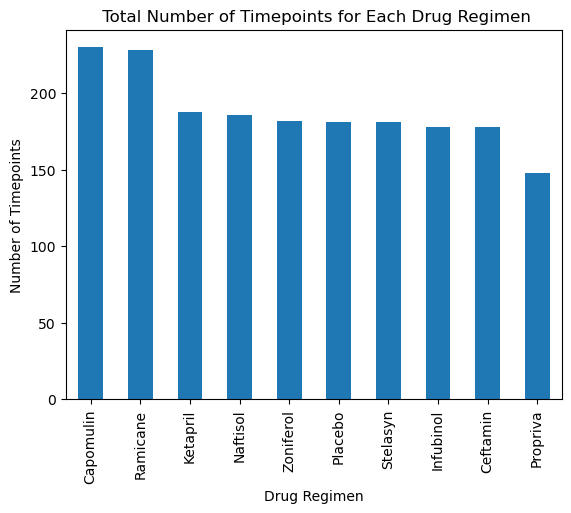

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
clean_df['Drug Regimen'].value_counts().plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.title(' Total Number of Timepoints for Each Drug Regimen')
plt.show()


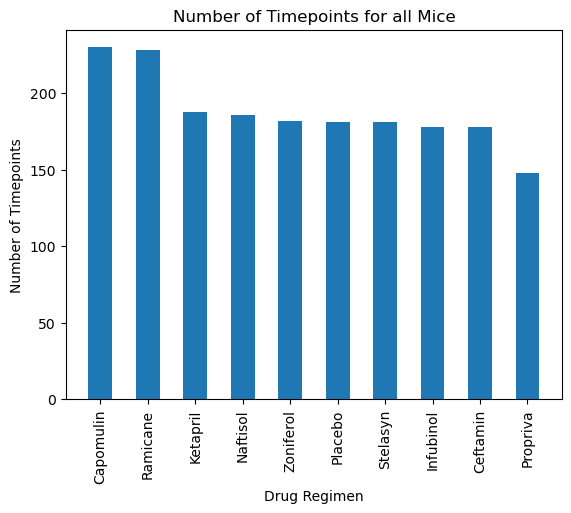

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_counts = clean_df['Drug Regimen'].value_counts()
plt.bar(drug_counts.index, drug_counts.values, width=0.5)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.title('Number of Timepoints for all Mice')
plt.xticks(rotation=90)
plt.show()


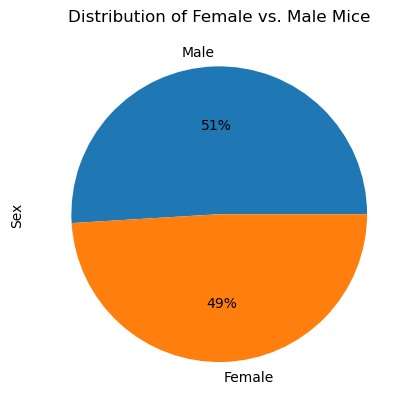

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = clean_df['Sex'].value_counts()
gender_counts.plot(kind='pie', autopct= '%1.lf%%')
plt.title('Distribution of Female vs. Male Mice')
plt.show()


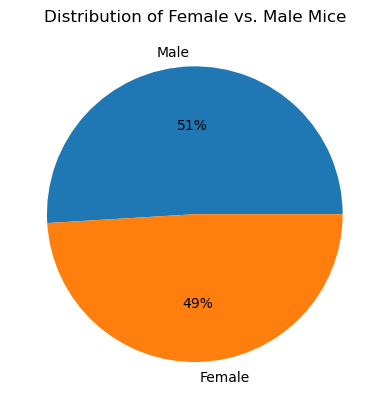

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.lf%%')
plt.title('Distribution of Female vs. Male Mice')
plt.show()


## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoint, clean_df, on=['Mouse ID', 'Timepoint'], how='left')
merged_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    #Get tumor volumes for ea treatment
    final_tumor_vol = merged_data.loc[merged_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_volumes.append(final_tumor_vol)
    
   #Calculate IQR
    quartiles = final_tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound)| (final_tumor_vol > upper_bound)]
    
    print (f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


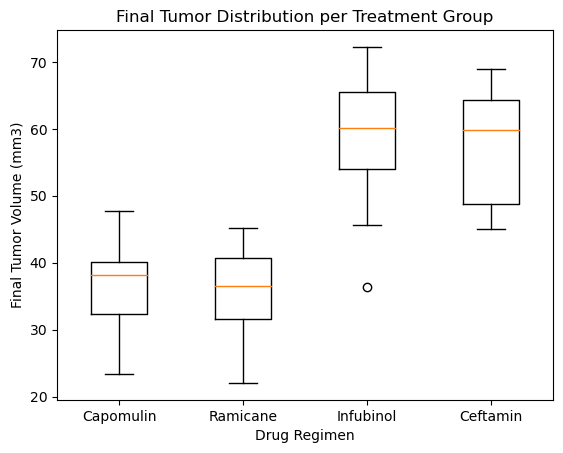

In [24]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volumes, labels=treatments)
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title ('Final Tumor Distribution per Treatment Group')
plt.show()


## Line and Scatter Plots

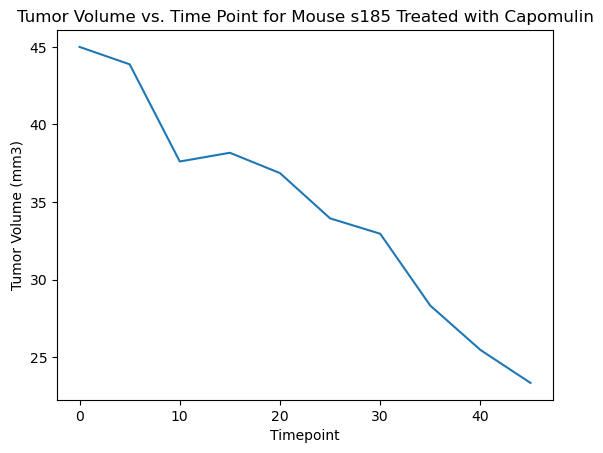

In [29]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Select a mouse treated with Capomulin
capomulin_mouse = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin'].iloc[0]['Mouse ID']

#Generate a line plot of tumor volume vs. time point for a mouse trate w/Capomulin
capomulin_data = clean_df.loc[clean_df['Mouse ID'] == capomulin_mouse]
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Time Point for Mouse {capomulin_mouse} Treated with Capomulin')
plt.show()


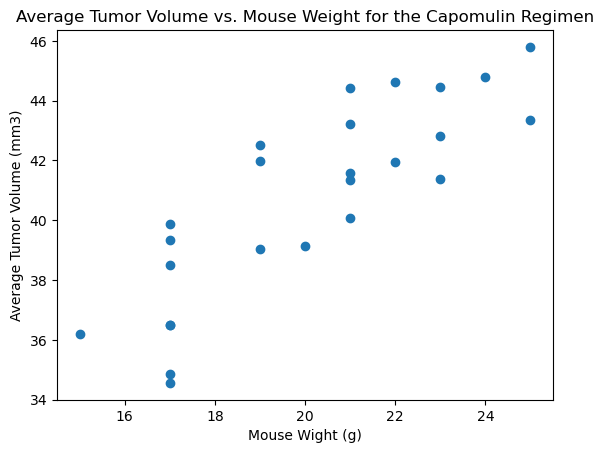

In [30]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_group = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')
capomulin_avg_tumor_vol = capomulin_group['Tumor Volume (mm3)'].mean()
capomulin_weight = capomulin_group['Weight (g)'].first()

plt.scatter(capomulin_weight, capomulin_avg_tumor_vol)
plt.xlabel('Mouse Wight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen')
plt.show()


## Correlation and Regression

The correlation coefficient between mouse and weight and average tumor volume is 0.841936342469472.


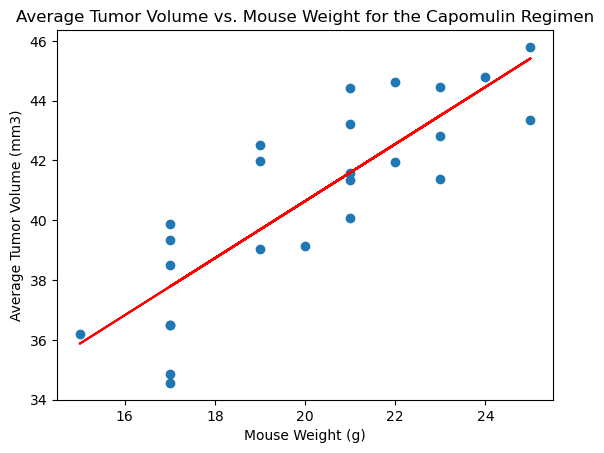

In [32]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(capomulin_weight, capomulin_avg_tumor_vol)[0]
print(f"The correlation coefficient between mouse and weight and average tumor volume is {correlation}.")

#Calculate the linea regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_weight, capomulin_avg_tumor_vol)
regression_values = capomulin_weight * slope + intercept

#Plot the linear regression model on the scatter plot
plt.scatter(capomulin_weight, capomulin_avg_tumor_vol)
plt.plot(capomulin_weight, regression_values, 'r-')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen')
plt.show()